In [347]:
import pandas as pd
import json
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\T201605PDPI+BNFT.csv")

In [181]:
df['month'] = 5
df['year'] = 2016

In [182]:
df.head(10)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month,year
0,5668,8092,592,2,44.10,40.84,189,5,2016
1,1596,17512,16983,2,1.64,1.64,35,5,2016
2,1596,25587,16124,1,1.26,1.28,42,5,2016
3,1596,12551,1282,2,0.86,1.02,42,5,2016
4,1596,18938,10575,1,1.85,1.82,56,5,2016
5,1596,8777,21507,1,3.31,3.18,56,5,2016
6,1596,9369,12008,1,63.15,58.56,56,5,2016
7,1596,27926,17643,2,158.66,147.07,56,5,2016
8,1596,26148,10230,1,0.35,0.44,14,5,2016
9,1596,9148,3381,1,0.26,0.35,7,5,2016


In [151]:
len(df)

10096213

In [164]:
dff = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\T201606PDPI+BNFT.csv")

In [183]:
dff['month'] = 6
dff['year'] = 2016

In [184]:
dff.head(5)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month,year
0,5668,10786,24434,1,5.64,5.23,126,6,2016
1,5668,12619,17572,1,2.76,2.57,105,6,2016
2,1596,18335,22620,1,4.88,4.53,28,6,2016
3,1596,17512,16983,3,1.10,1.36,26,6,2016
4,1596,25587,16124,1,0.38,0.46,14,6,2016


In [165]:
len(dff)

10240053

In [126]:
jsondata=pd.read_json("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\column_remapping.json")

In [127]:
jsondata.head(10)

,bnf_code,bnf_name,practice
0,091200000BFMBDG,Salts_Second Nature Flng 32mm Wafer 110,Y05644
1,1501041T0AAATAT,Sigvaris Traditional 500 CL2 Thigh Open,D83013
10,23605906047,Baxter_Viaflex Sod ChlorI/V Inf.45%500ml,E85126
100,0206020C0AABFBF,Zyprexa_Velotab 20mg,Y04663
1000,23602406009,Sod Chlor_I/V Inf 0.9% 50ml Amp,E85059
10000,091200000BFQKA0,Pyridox HCl_Liq Spec 25mg/5ml,Y04981
10001,190700000BBCJA0,Kendall 10cm x 14cm Wound Dress Calc Alg,P83025
10002,20030500015,Dansac_NovaLife 1 Convex Midi Ileo Bag C,Y05279
10003,23550605500,Limb Limbo Adult 1/2 Leg Lge Build Water,Y02467
10004,0410030C0BEAAAF,Glyceryl Trinit Oint 0.2%/WSP_Oint,E82131


In [128]:
chem=pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\chem.csv")

In [129]:
chem.head(10)

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite
5,0101010F0,Magnesium Carbonate
6,0101010G0,Co-Magaldrox(Magnesium/Aluminium Hydrox)
7,0101010I0,Magnesium Oxide
8,0101010J0,Magnesium Trisilicate
9,0101010L0,Aluminium & Magnesium & Act Simeticone


In [130]:
chem.columns = [c.replace(' ', '_') for c in chem.columns]

In [131]:
chem.head(5)

,CHEM_SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [132]:
jsondata['bnf_code'][1:10]

1        1501041T0AAATAT
10           23605906047
100      0206020C0AABFBF
1000         23602406009
10000    091200000BFQKA0
10001    190700000BBCJA0
10002        20030500015
10003        23550605500
10004    0410030C0BEAAAF
Name: bnf_code, dtype: object

In [134]:
chem['CHEM_SUB'][1:10]

1    0101010B0
2    0101010C0
3    0101010D0
4    0101010E0
5    0101010F0
6    0101010G0
7    0101010I0
8    0101010J0
9    0101010L0
Name: CHEM_SUB, dtype: object

In [135]:
bnf_code = jsondata['bnf_code'].unique()
CHEM_sub = chem['CHEM_SUB'].unique()

In [136]:
bnf_code

array(['091200000BFMBDG', '1501041T0AAATAT', '23605906047', ...,
       '20200000193', '20050300299', '21160000070'], dtype=object)

In [137]:
CHEM_sub

array(['0101010A0', '0101010B0', '0101010C0', ..., '0605010AF',
       '0406000AH', '0908010AQ'], dtype=object)

In [139]:
bnf = jsondata['bnf_code'].str.slice(start=0, stop=9)

In [141]:
bnf[1:10]

1        1501041T0
10       236059060
100      0206020C0
1000     236024060
10000    091200000
10001    190700000
10002    200305000
10003    235506055
10004    0410030C0
Name: bnf_code, dtype: object

In [142]:
lookup = jsondata[bnf.isin(CHEM_sub)]

In [145]:
lookup[10:20]

,bnf_code,bnf_name,practice
10012,0206020C0BYAAAJ,Fortuna Fast 10.75cmx5m (Yellow)Stkntte,B85060
10013,0401020G0AAAAAA,Lloyds_Rehyd Tt Gran sach 4.87g,M92030
10015,0403030L0AAABAB,Coal Tar Soln 5%/WSP_Oint,M83712
10016,0203020F0AAARAR,Frusol_Oral Soln 50mg/5ml S/F,G85644
10020,0410030A0AAAMAM,Skinnies Silk Vest Sleeveless Adult Sml,E85687
10021,0906026V0BBACAA,Jobst Bellavar Class 2 Knee High Open To,J82113
10022,0205051L0AAAIAI,Salts_Harmony Duo Drnbl Lge Pouch 13-50m,Y02716
10023,0501070I0BBACAE,Pro D3_Cap 1 000u,Y01676
10025,1303000F0BCAAAA,Juzo Hostess Class 2 Tights Open Toe Lym,Y00446
10026,0102000L0AAAWAW,Eesiban 10cm x 5m Stkntte Ribbed Tublr,C82624


In [148]:
index = lookup.index.values

In [185]:
df1 = df[df['bnf_code'].isin(index)]

In [186]:
len(df1)

8908139

In [162]:
#df1_max = df1.nlargest(50, 'quantity')

In [206]:
df2 = df1[df1['bnf_code'] == 8687]

In [216]:
len(df2)

1645

In [200]:
dff1 = dff[dff['bnf_code'].isin(index)]

In [189]:
len(dff1)

8991792

In [168]:
#dff1_max = dff1.nlargest(50, 'quantity')

In [207]:
dff2 = dff1[dff1['bnf_code'] == 8687]

In [210]:
compare = dff2[dff2['practice'].isin(df2['practice'])]

In [211]:
len(compare)

1521

In [212]:
combined = df2.append(compare, ignore_index = True)

In [213]:
len(combined)

3166

In [222]:
len(combined['practice'].unique()) 
#len(combined['bnf_code'].unique())

1645

In [308]:
combined.to_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\ReducedCombined05n06.csv")

In [328]:
y = combined['quantity']
print(y.shape)

(3166,)
(3166, 1)


C:\Users\VEENA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\VEENA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [329]:
min(y), max(y), y.mean(), y.median()

(15, 2213240, 30226.925773847124, 4147.5)

{'boxes': [<matplotlib.lines.Line2D at 0x1b5032a6208>],
 'caps': [<matplotlib.lines.Line2D at 0x1b5032a7668>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b5032a8748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b5032a64a8>,
  <matplotlib.lines.Line2D at 0x1b5032a6dd8>]}

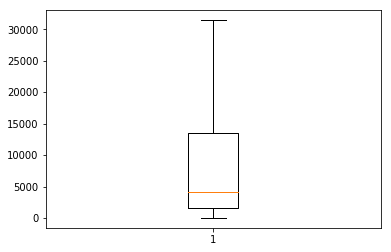

In [353]:
#combined.boxplot(column = ['quantity'], grid = True, fontsize = 10)
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y, flierprops=green_diamond, showfliers=False)

In [354]:
ysmall = y[combined['practice'] <= 30000]
yysmall = ysmall.reshape(len(ysmall), 1)
standard = preprocessing.StandardScaler()
y_norm = standard.fit_transform(yy_small)
print(yy_small.shape)

NameError: name 'ysmall' is not defined

In [330]:
#X = combined.drop(columns = ['quantity', 'year', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'practice'])
practice_encoded = pd.get_dummies(combined['practice'])
month_encoded = pd.get_dummies(combined['month'])
print(practice_encoded.shape)
print(month_encoded.shape)

X_new = pd.concat([month_encoded, practice_encoded], axis=1)

(3166, 1645)
(3166, 2)


In [331]:
X_new.head(5)

,5,6,2,5,7,14,18,20,23,33,...,10599,10606,10607,10621,10625,10627,10630,10632,10648,10656
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_norm, train_size = 0.7, shuffle = True)

C:\Users\VEENA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [333]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [334]:
y_pred = regressor.predict(X_test)

In [335]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[1.28089493e+08 1.28089493e+08 8.27390171e+02 ... 8.27432673e+02
  8.27397006e+02 0.00000000e+00]]


In [336]:
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Variance score: -2.382871568976154e+23
